In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
warnings.filterwarnings("ignore")

# Análise exploratória

In [3]:
#carregar o arquivo e armazena-lo como um DataFrame do Pandas
df_dados = pd.read_csv("dataset_spotify_songs.csv")

In [5]:
#verificar a quantidade de linhas e colunas do arquivo
df_dados.shape

(114000, 21)

In [7]:
#verificar as linhas iniciais do DataFrame
df_dados.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [9]:
#verificar as linhas finais do DataFrame
df_dados.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


In [11]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [13]:
df_dados.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [15]:
# verificar se alguma variável possui valor nulo
df_dados.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [17]:
df_dados.dropna(inplace=True)

df_dados = df_dados.drop(columns=['Unnamed: 0'], errors='ignore')
df_dados['explicit'] = df_dados['explicit'].astype(int)

df_dados.drop_duplicates(inplace=True)

In [19]:
# Seleciona colunas numéricas (int64 e float64)
variaveis_numericas = df_dados.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Exibir nome das colunas e seus tipos
for coluna in variaveis_numericas:
    print(f"{coluna}: {df_dados[coluna].dtype}")

print(f"\nTotal de colunas numéricas identificadas: {len(variaveis_numericas)}")

popularity: int64
duration_ms: int64
danceability: float64
energy: float64
key: int64
loudness: float64
mode: int64
speechiness: float64
acousticness: float64
instrumentalness: float64
liveness: float64
valence: float64
tempo: float64
time_signature: int64

Total de colunas numéricas identificadas: 14


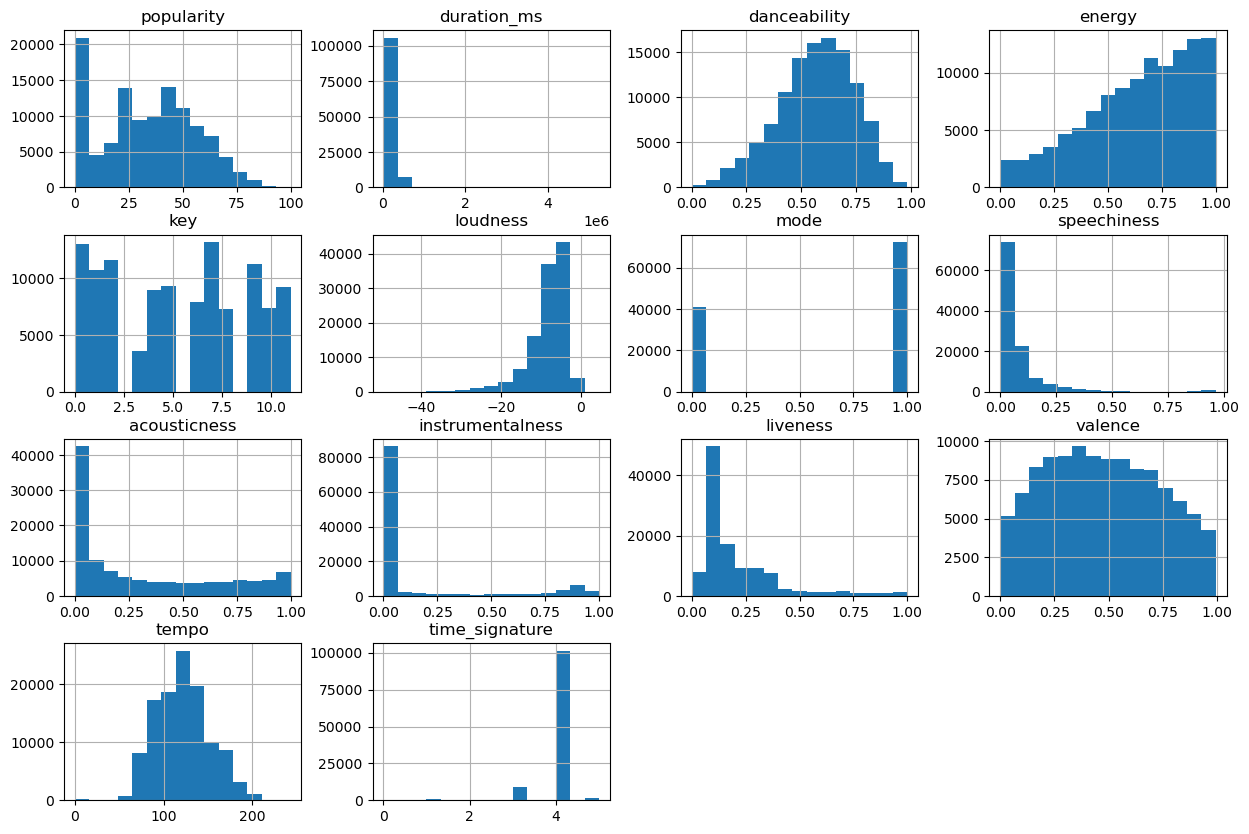

In [21]:
df_dados[variaveis_numericas].hist(bins=15, figsize=(15, 10))
plt.show()

*Distribuição da Popularidade:* Observamos através do histograma que, nesta base de dados, a popularidade das músicas está bem distribuída até o valor de 60. No entanto, após esse ponto, há poucos dados com alta popularidade e muitos dados com popularidade baixa (0). Isso sugere que apenas algumas músicas são extremamente populares, enquanto a maioria possui uma popularidade mais baixa.

*Características Acústicas:* A maioria das músicas nessa base de dados possui valores altos de Danceability (adequação para dançar), Energy (intensidade) e Loudness (sonoridade). Por outro lado, os valores de Acousticness (confiança de ser acústico), Instrumentalness (probabilidade de ser instrumental) e Liveness (presença de uma audiência) tendem a ser mais baixos na maioria dos casos.

*Equilíbrio em Outros Atributos:* A análise das características Valence (positividade musical), Mode (modalidade), Key (tonalidade) e Tempo (batidas por minuto) mostra uma distribuição mais equilibrada, sem grandes disparidades entre valores altos e baixos. Isso indica uma diversidade na composição musical quanto a esses atributos, sem uma predominância clara de um extremo ou outro.

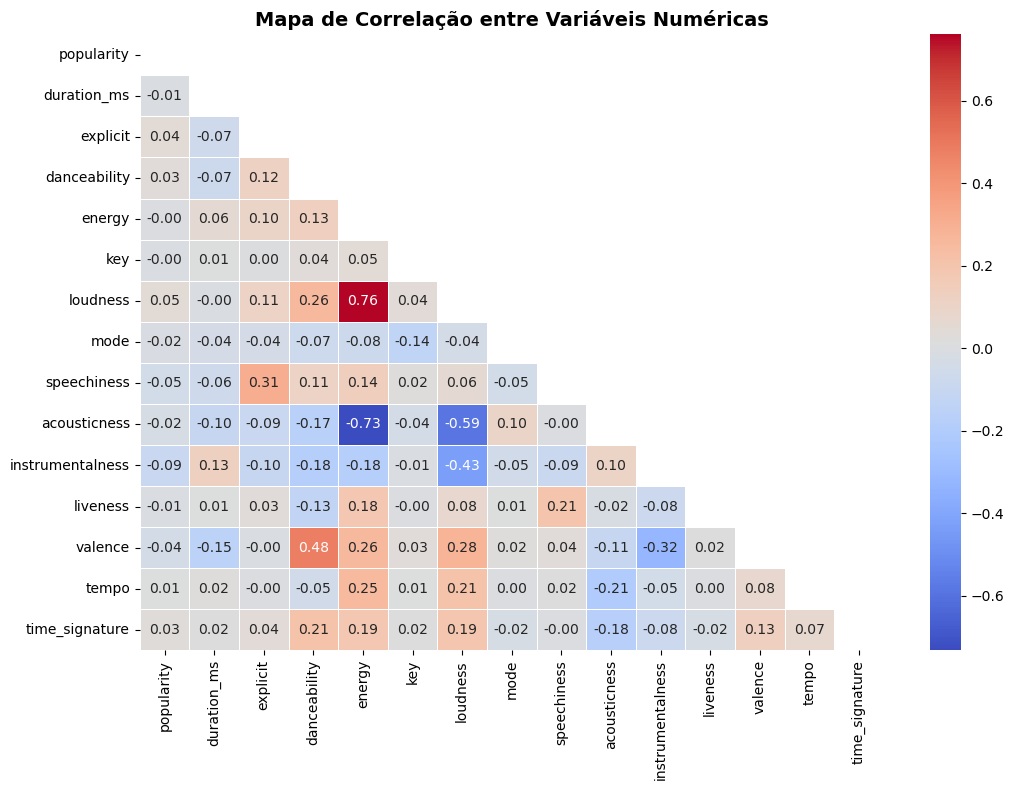

In [25]:
# Seleciona apenas colunas numéricas
numerico_df = df_dados.select_dtypes(include=[float, int])

# Calcula a matriz de correlação
correlacao = numerico_df.corr()

# Cria uma máscara para ocultar a diagonal superior
mask = np.triu(np.ones_like(correlacao, dtype=bool))

# Criar o mapa de calor da matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlacao, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

# Adicionar título
plt.title('Mapa de Correlação entre Variáveis Numéricas', fontsize=14, fontweight='bold')

# Exibir o gráfico
plt.show()

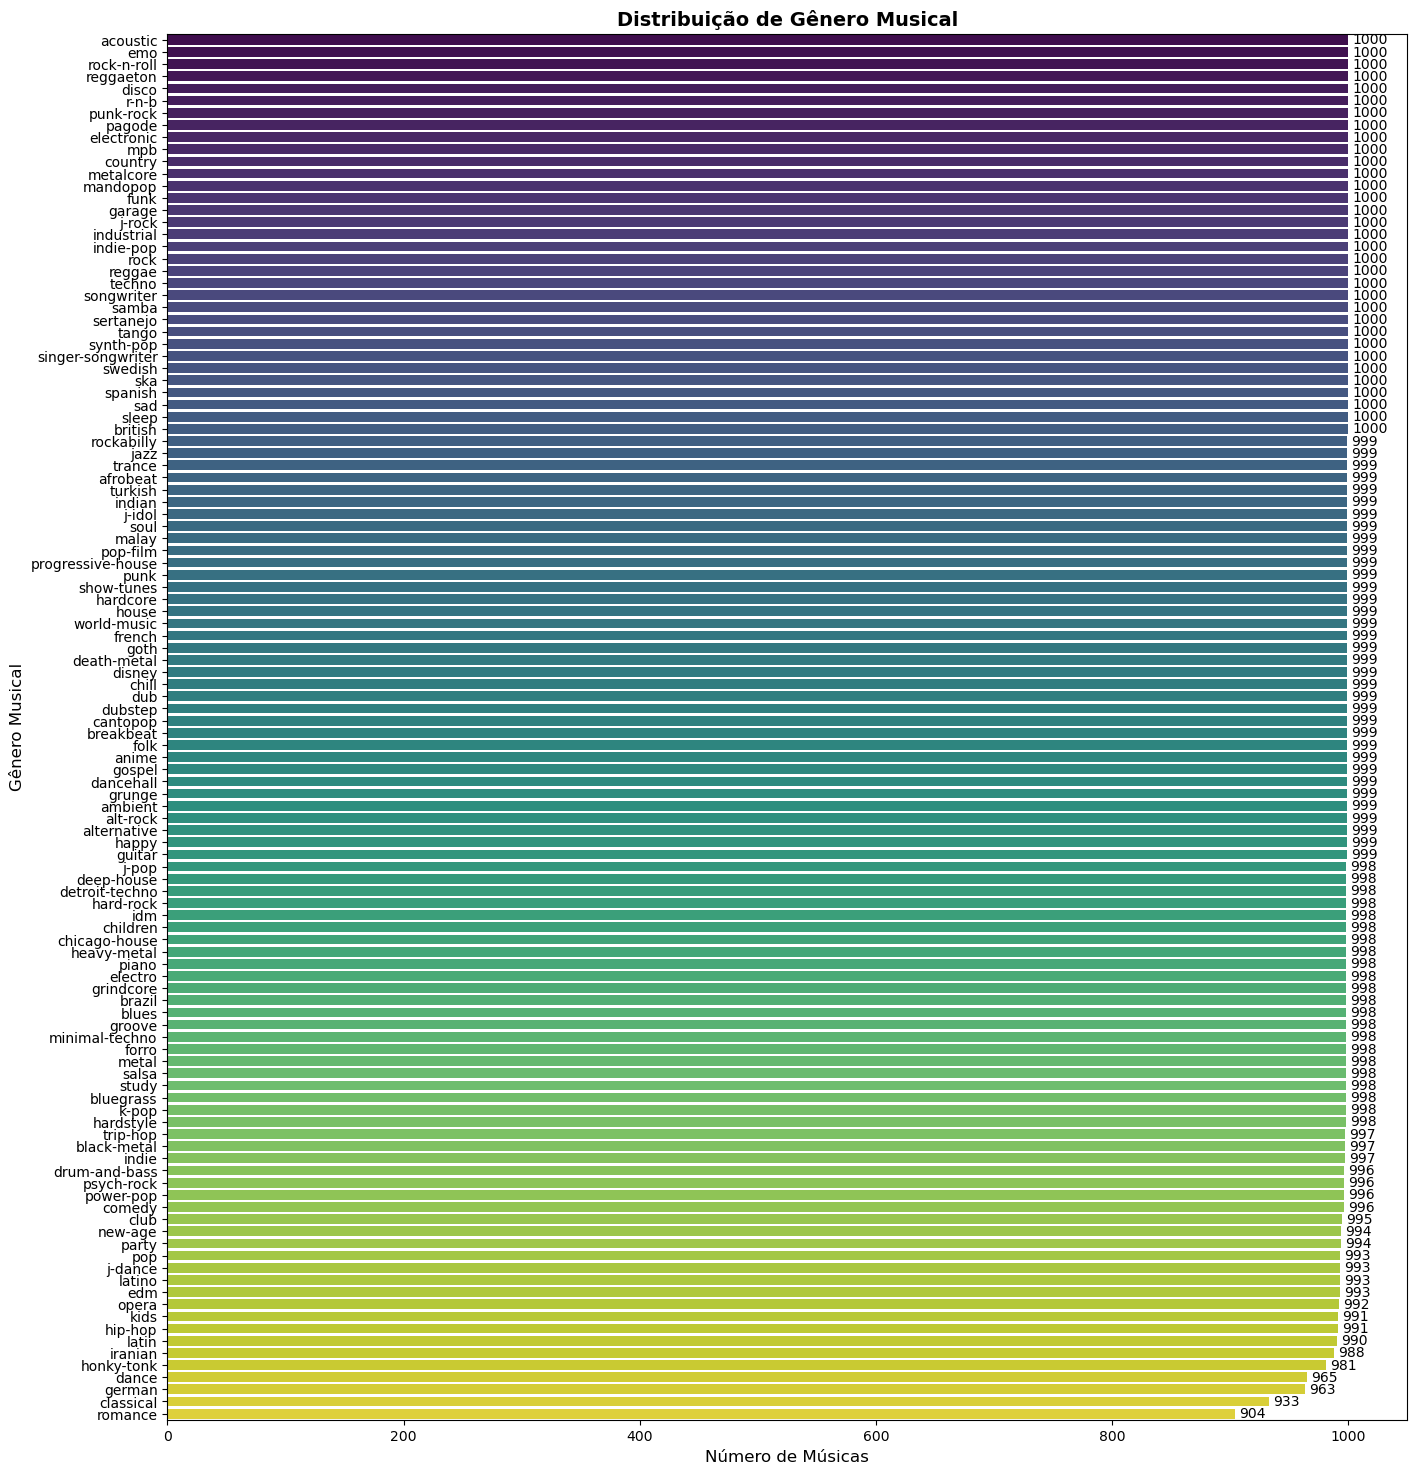

In [31]:
plt.figure(figsize=(16, 18))

# Criar gráfico de contagem
ax = sns.countplot(
    y='track_genre', 
    data=df_dados, 
    order=df_dados['track_genre'].value_counts().index, 
    palette="viridis"
)

# Adicionar rótulos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3, fontsize=10, color='black')

# Configurações do gráfico
plt.title('Distribuição de Gênero Musical', fontsize=14, fontweight='bold')
plt.xlabel('Número de Músicas', fontsize=12)
plt.ylabel('Gênero Musical', fontsize=12)

plt.show()

# Pergunta de Negócio 1:

Quais gêneros musicais são mais populares? Como podemos usar essa informação para definir prioridades em futuras produções ou aquisições?


In [34]:
df_dados_Gen = df_dados.groupby('track_genre')['popularity'].sum().reset_index().sort_values(by = 'popularity',
                                                                                    ascending = False).head(10)

In [36]:
df_dados_Gen.head(10)

,track_genre,popularity
81,pop-film,59221
65,k-pop,56850
15,chill,53651
94,sad,52379
44,grunge,49533
55,indian,49479
5,anime,48718
33,emo,48128
97,sertanejo,47866
80,pop,47568


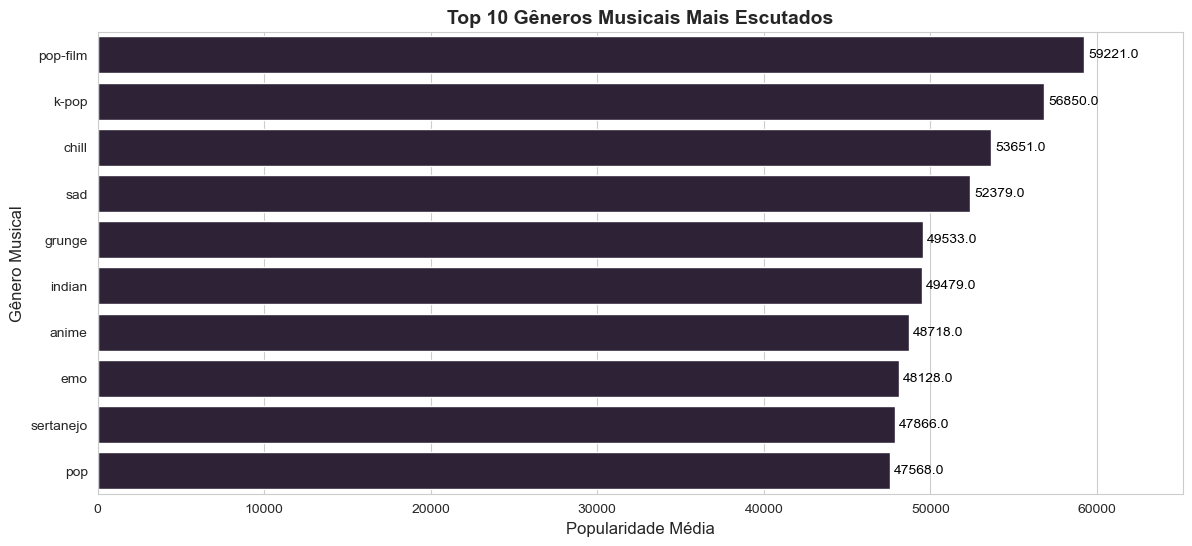

In [38]:
df_dados_Gen = df_dados_Gen.sort_values(by='popularity', ascending=False).head(10)

# Criar a figura
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")
sns.set_palette('mako')

# Criar gráfico de barras
ax = sns.barplot(
    data=df_dados_Gen, 
    y='track_genre', 
    x='popularity'
)

# Adicionar rótulos nos valores das barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', label_type='edge', padding=3, fontsize=10, color='black')

# Ajustes no gráfico
plt.title('Top 10 Gêneros Musicais Mais Escutados', fontsize=14, fontweight='bold')
plt.xlabel('Popularidade Média', fontsize=12)
plt.ylabel('Gênero Musical', fontsize=12)
plt.xlim(0, df_dados_Gen['popularity'].max() * 1.1)

plt.show()

*Popularidade de Gêneros:*
"Pop-film" é o gênero mais popular, com a maior soma de popularidade entre os gêneros listados. Isso indica um interesse significativo do público em músicas de filmes populares.
"K-pop" ocupa o segundo lugar, demonstrando a forte influência e popularidade global da música pop coreana.
Gêneros como "chill", "sad", e "grunge" também têm uma presença marcante, sugerindo uma preferência por músicas que podem estar associadas a diferentes estados emocionais ou vibes relaxantes.

*Diversidade de Preferências:*
A lista mostra uma diversidade de gêneros que vão desde anime e emo até sertanejo, o que reflete uma ampla variedade de preferências musicais entre os ouvintes. Isso pode indicar que, independentemente do gênero, existe um público significativo para diferentes estilos musicais.

*Mercado para Nichos:*
Gêneros como "indian" e "anime" aparecem entre os mais populares, sugerindo que mesmo gêneros de nicho ou específicos de uma cultura têm uma base de fãs considerável. Isso pode ser um indicativo de que há oportunidades de mercado nesses nichos que podem ser exploradas mais a fundo.

*Oportunidades de Exploração:*
Os dados sugerem que existem oportunidades para explorar mais a fundo os gêneros que estão no topo, como "pop-film" e "K-pop", em termos de produção, marketing e playlists. Também pode haver oportunidades para promover colaborações entre artistas desses gêneros para maximizar a popularidade e o alcance.

*Tendências Culturais e Emocionais:*
A presença de gêneros como "sad" e "emo" pode indicar uma tendência cultural atual de explorar temas emocionais profundos na música, que pode estar ressoando com um segmento significativo de ouvintes.

# Pergunta de Negócio 2:
Quais características músicais tem alguma correlação com Popularidade?

Variáveis numéricas selecionadas: ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']


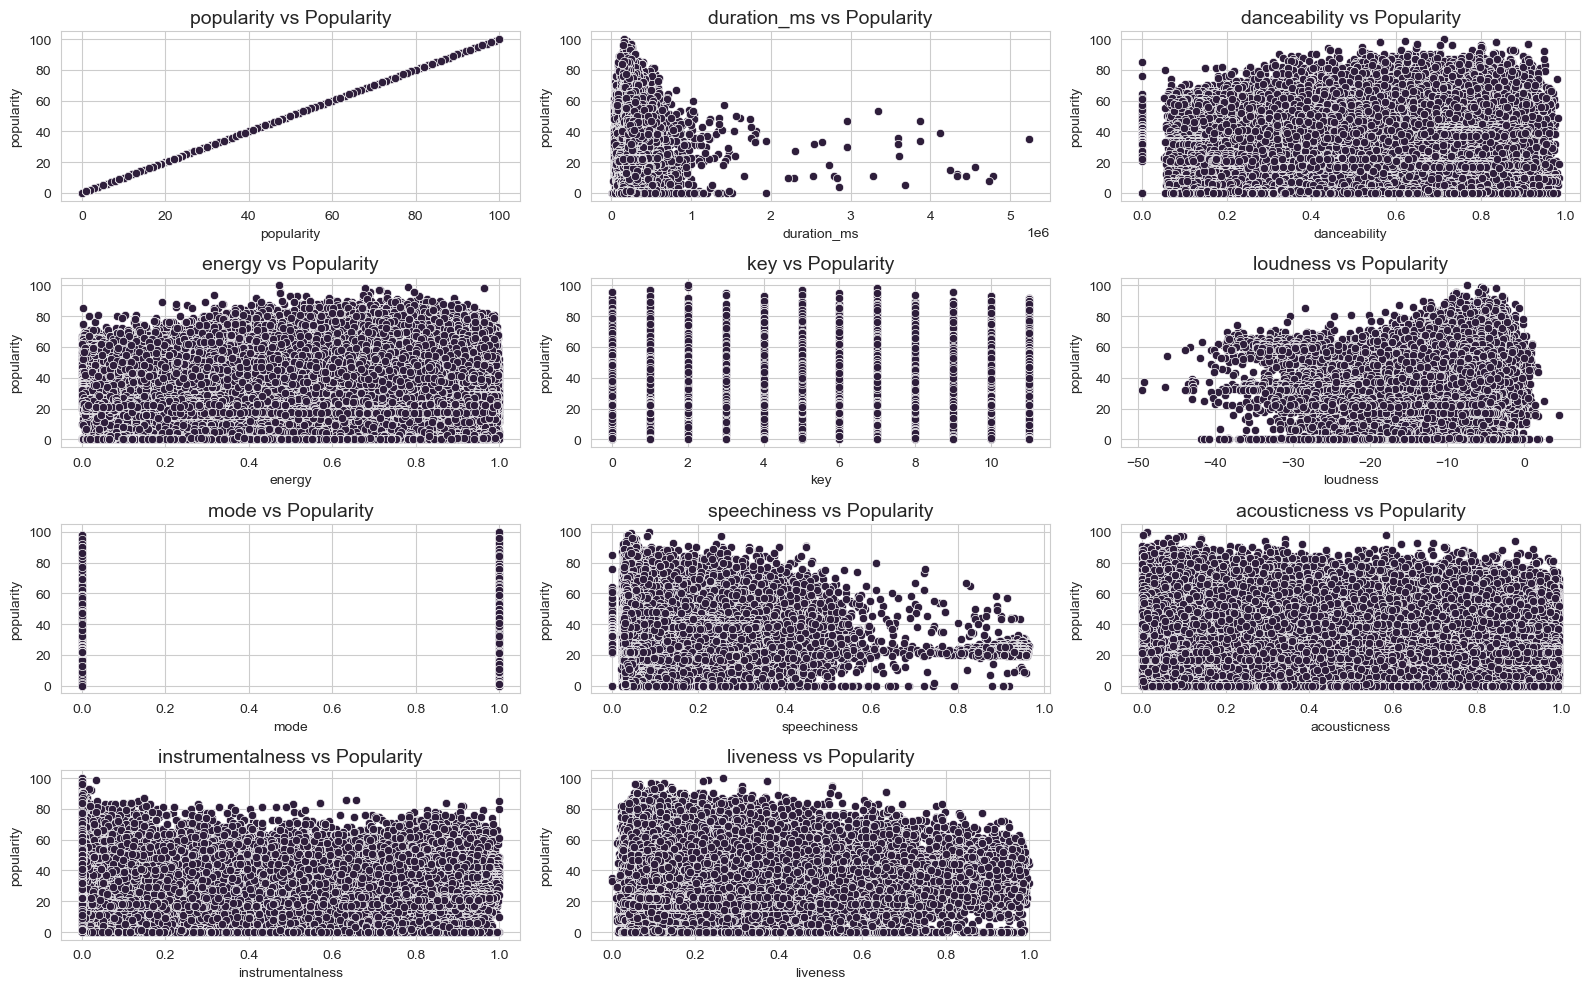

In [44]:
variaveis_numericas = df_dados.select_dtypes(include=['int64', 'float64']).columns[:11].tolist()
print("Variáveis numéricas selecionadas:", variaveis_numericas)

plt.rcParams["figure.figsize"] = [14, 10]
plt.rcParams["figure.autolayout"] = True
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14

# Definir grid dinâmico baseado no número de variáveis
num_vars = len(variaveis_numericas)
num_cols = 3
num_rows = math.ceil(num_vars / num_cols)  # Calcular número de linhas necessário

# Criar subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 10))
axes = axes.flatten()  # Transformar a matriz de eixos em um array para facilitar a iteração

# Criar gráficos de dispersão para cada variável
for idx, var in enumerate(variaveis_numericas):
    sns.scatterplot(data=df_dados, x=var, y='popularity', ax=axes[idx])
    axes[idx].set_title(f'{var} vs Popularity')

# Remover gráficos vazios (caso existam)
for idx in range(len(variaveis_numericas), len(axes)):
    fig.delaxes(axes[idx])

# Ajustar espaçamento
plt.tight_layout()
plt.show()

No primeiro gráfico de dispersão, que mostra a relação entre Popularidade e Popularidade, observamos uma correlação perfeita e muito forte, pois estamos comparando a mesma variável consigo mesma. Isso significa que, à medida que o valor de uma aumenta, o valor da outra também aumenta na mesma proporção.

No entanto, ao analisar os outros gráficos, não encontramos nenhuma correlação significativa entre Popularidade e as demais variáveis. Esses gráficos apresentam uma distribuição dispersa dos pontos, sem formar um padrão claro de crescimento ou decrescimento. Isso indica que as variáveis analisadas não possuem uma relação linear evidente com a Popularidade, resultando em uma ausência de correlação positiva ou negativa. Em resumo, não há uma tendência consistente que permita afirmar que a Popularidade aumenta ou diminui com o aumento ou diminuição dessas outras variáveis; elas são, essencialmente, independentes entre si.

# Pergunta de negócio 3:
Quais artistas têm as músicas mais populares? Como podemos explorar colaborações para aumentar a popularidade das músicas?


In [46]:
# Devido a base de dados ser grande agrupamos por artistas e calculamos a popularidade listando apenas os 25 mais populares.
df_dados_art = df_dados.groupby('artists')['popularity'].sum().reset_index().sort_values(by = 'popularity', ascending = False).head(25)

In [48]:
df_dados_art.head(10)

,artists,popularity
26983,The Beatles,17021
16049,Linkin Park,12560
2783,BTS,10358
21810,Prateek Kuhad,10054
8647,Elvis Presley,9307
2095,Arctic Monkeys,8461
5016,Charlie Brown Jr.,7136
22762,Red Hot Chili Peppers,6460
5583,CoComelon,6023
22531,Rammstein,5825


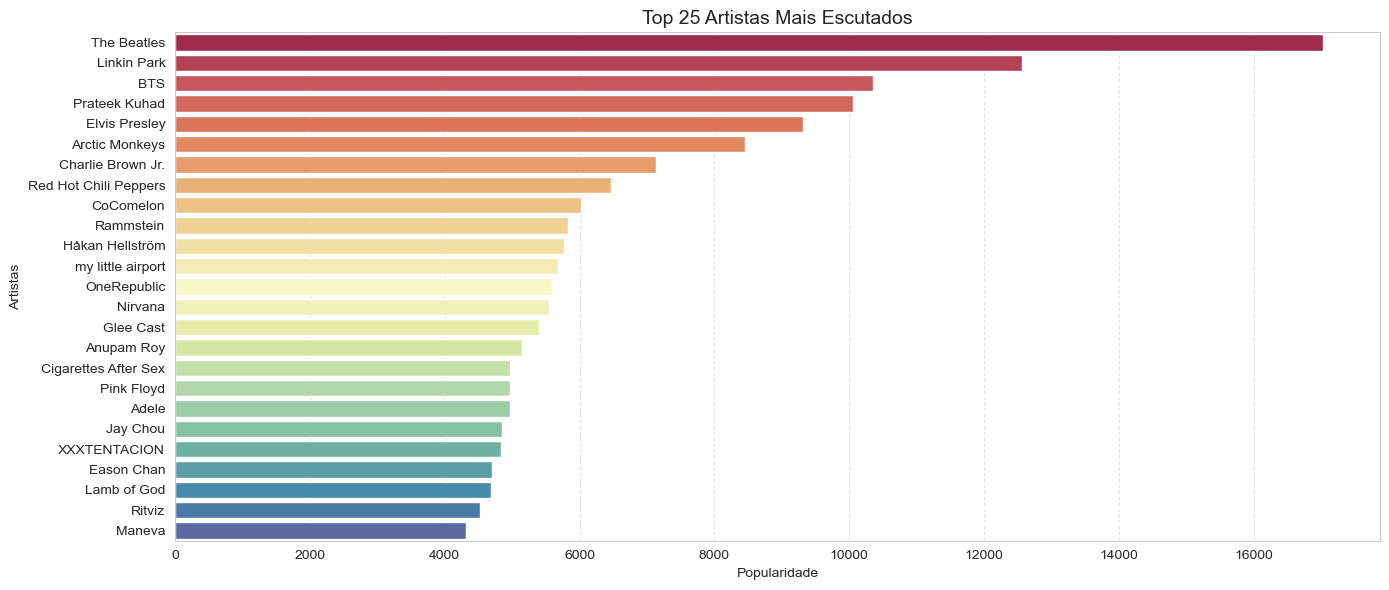

In [52]:
# Selecionar os 25 artistas mais populares
df_top_artists = df_dados_art.nlargest(25, 'popularity')

# Criar o gráfico de barras
plt.figure(figsize=(14, 6))
sns.barplot(data=df_top_artists, 
            y='artists', 
            x='popularity', 
            palette='Spectral')

# Ajustes do gráfico
plt.xlabel('Popularidade')
plt.ylabel('Artistas')
plt.title('Top 25 Artistas Mais Escutados', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.show()

*Variedade de Gêneros e Popularidade Global*: A lista inclui artistas de diversos gêneros musicais, como rock clássico (The Beatles, Elvis Presley), rock alternativo (Linkin Park, Arctic Monkeys), K-pop (BTS), música infantil (CoComelon), e outros. Isso indica uma ampla variedade de estilos musicais que atraem grandes audiências, demonstrando a diversidade de preferências musicais ao redor do mundo.

*Popularidade Sustentada de Artistas Clássicos:* Artistas clássicos como The Beatles e Elvis Presley ainda possuem uma popularidade significativa, o que sugere que a música deles continua a ressoar com as novas gerações e a manter uma base de fãs leal ao longo do tempo.

*Influência da Música Moderna:* Grupos como BTS e Linkin Park, que têm uma presença significativa em plataformas digitais e redes sociais, mostram uma popularidade forte, indicando a influência das mídias sociais e das plataformas de streaming na promoção de artistas e na formação de fãs globais.

*Popularidade Regional:* Artistas como Prateek Kuhad e Charlie Brown JR, que podem ser mais populares em regiões específicas (como a Índia e Brasil), mostram que artistas regionais também podem alcançar alta popularidade, possivelmente devido ao crescimento de plataformas de streaming que permitem o acesso fácil a uma variedade de músicas.

*Impacto da Música Infantil:* CoComelon, conhecido por conteúdo infantil, aparece na lista, destacando a importância do entretenimento infantil e a popularidade crescente de músicas e vídeos para crianças.